# Clustering de documents

## Imports

In [456]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [457]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [458]:
data_path = "../../data/txt/"

## Choisir une décennie

In [459]:
DECADE = '1940'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [460]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [461]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [462]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [463]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [464]:
tfidf_vectors = vectorizer.fit_transform(texts)

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [465]:
# Détail de la matrice
tfidf_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 940250 stored elements and shape (1006, 4599)>

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [466]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [467]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [468]:
clusters = km_model.fit_predict(tfidf_vectors)

In [469]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [470]:
pprint(dict(clustering))

{np.int32(0): ['KB_JB838_1940-01-05_01-00009.txt',
               'KB_JB838_1940-01-07_01-00014.txt',
               'KB_JB838_1940-02-05_01-00008.txt',
               'KB_JB838_1940-02-18_01-00014.txt',
               'KB_JB838_1940-02-25_01-00011.txt',
               'KB_JB838_1940-02-29_01-00008.txt',
               'KB_JB838_1940-03-02_01-00009.txt',
               'KB_JB838_1940-03-03_01-00012.txt',
               'KB_JB838_1940-03-22_01-00009.txt',
               'KB_JB838_1940-03-25_01-00007.txt',
               'KB_JB838_1940-04-17_01-00012.txt',
               'KB_JB838_1940-05-09_01-00010.txt',
               'KB_JB838_1940-06-29_01-00007.txt',
               'KB_JB838_1940-07-30_01-00007.txt',
               'KB_JB838_1940-08-06_01-00007.txt',
               'KB_JB838_1940-09-08_01-00011.txt',
               'KB_JB838_1940-09-18_01-00007.txt',
               'KB_JB838_1940-09-29_01-00009.txt',
               'KB_JB838_1940-10-09_01-00008.txt',
               'KB_JB838_1940-1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA

In [471]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [472]:
reduced_vectors[:10]

array([[-0.15279215, -0.01397881],
       [-0.14048129, -0.06473292],
       [-0.22064576,  0.08605586],
       [-0.12491334, -0.07424299],
       [-0.19231917,  0.04540156],
       [-0.26137116,  0.17185228],
       [ 0.61453471,  0.18345824],
       [ 0.12255914, -0.07558386],
       [-0.29733509,  0.28180802],
       [-0.26311919,  0.13261262]])

### Générer le plot

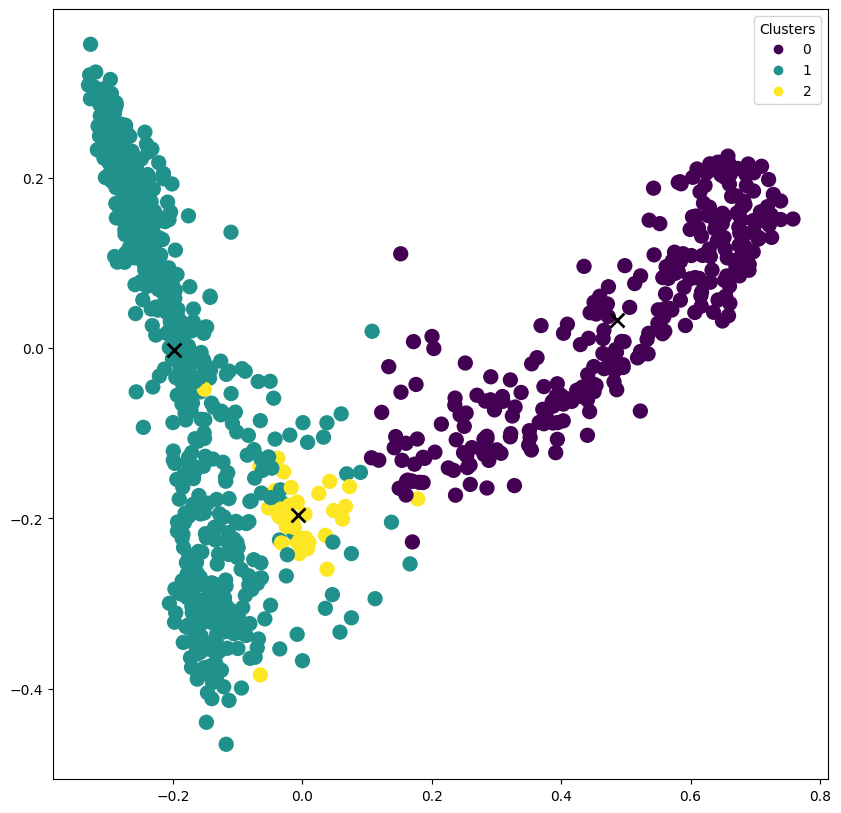

In [473]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Nuages de mots

## Imports et stopwords

In [474]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [475]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "pers", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "voire", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "bruxelles", "brux", "chambre",
       "maison", "rue", "villa", "tél", "téléph", "prix", "louer", "lieu", "midi", "devant",
       "bon", "très", "déjà", "vers", "long", "lundi", "mardi", "mercredi", "jeudi", "vendredi",
       "samedi", "dimanche", "leurs", "chaque", "quelque", "année", "place", "grand",
       "agence", "ans", "ecr", "ecrire", "part", "heures", "vendre", "jour", "mod",
       "cours", "belgique", "pays", "francs", "belge", "grande", "petite", "petit",
       "toute", "faç", "soir", "compte", "il", "elle", "elles", "anvers", "namur", "liège",
       "appart", "rapp", "garage", "cas", "prés", "heure", "janvier", "février", "mars", "avril",
       "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre", "premier",
       "gros", "alors", "dès", "cent", "vend", "demande", "référ", "lot", "achat", "cher", "bonne",
       "peu", "beaucoup", "avant", "tant", "trav", "suite", "vingt", "bat", "parmi", "aujourd",
       "mois", "etc", "vente", "nord", "cherche", "avenue", "temps", "quelques", "jours", "partie",
       "beau", "belle", "comm", "jamais", "près", "point", "mme", "app", "jardin", "jard",
       "cap", "centre", "sud", "ouest", "est", "env", "haut", "dame", "homme", "fem", "fort",
       "divers", "grands", "cour", "chez", "jean", "hommes", "femmes","plusieurs", "vient",
       "celui", "matin", "question", "bureau", "mat", "bas", "pris", "gar", "car",
       "min", "dernier", "trop", "début", "dan", "reste", "lequel", "laquelle", "ceux", "celles",
       "première", "argent", "succès", "semaine", "quand", "nom", "but", "max", "série", "hui",
       "un", "deux", "trois", "quatre", "cinq", "six", "sept", "huit", "neuf", "dix", "serv",
       "fois", "fit", "cependant", "int", "annoncer", "nombreux", "nombreuses", "téléphone",
       "demi", "quart", "seul", "seule", "rez", "atelier", "services", "chaussée", "ailleurs",
       "seulement", "départ", "parti", "entrée", "nombre", "fille", "occasion", "offre",
       "rien", "sér", "service", "mètres", "avis", "dos", "tandis", "offres", "auto", "chêne",
       "résultat", "cont", "culs", "notamment", "eau", "dés", "résultats", "voiture", "pet",
       "assez", "louvain", "partir", "bons", "main", "noir", "étage", "mén", "ire", "bur", "réf",
       "adresser", "main", "article", "club", "enfin", "journée", "journées", "produits", "mons",
       "enf", "également", "monsieur", "madame", "nuit", "conditions", "importante",
       "paul", "sup", "ord", "com", "façon", "ménage", "commune", "mlle", "côté", "joseph", "louis",
       "henri", "bel", "séance", "sujet", "article", "mieux", "ach", "lors", "meubles", "camion",
       "malgré", "effet", "mot", "beaux", "puis", "cond", "titre", "vis", "mol", "concret", "gens",
       "gand", "haute", "courant", "ixelles", "anderlecht", "schaerbeek", "uccle", "pierre",
       "situation", "rem", "lux", "mach", "suivant", "direction", "dames", "grandes", "marie",
       "femme", "mari", "tient", "parc", "jette", "hôtel", "petits", "diverses", "actuellement",
       "louise", "prochain", "membres", "bols", "petites", "lots", "font", "adr", "forest",
       "georges", "écrit", "environ", "peuvent", "jne", "âge", "quant", "selon", "magasin",
       "affaires", "acheteur", "acheteurs", "affaire", "parce", "tapis", "groupe", "vieux", "jeunes",
       "achet", "doivent", "mesure", "tonnes", "waterloo", "fils", "tête", "millions", "pourrait",
       "heu", "moment", "double", "outre", "inst", "jeunes", "années", "chamb", "pied", "aven",
       "semble", "sens", "den", "sait", "forme", "matériel", "salle", "jeune", "off", "bureaux",
       "pièces", "poids", "étalent", "meub", "unique", "souvent", "hier", "lorsque", "points"]

#ajout de stopwords supplémentaires depuis chatgpt
extra_sw = [
    "afin", "aucun", "aucune", "auquel", "auxquels", "auxquelles", 
    "ceci", "cela", "celui-ci", "celle-ci", "ceux-ci", "celles-ci",
    "chacun", "chacune", "certains", "certaines", "difficile",
    "ensemble", "ensuite", "exact", "exacte", "exactement",
    "hormis", "ici", "là", "la", "lesquels", "lesquelles",
    "loué", "louée", "louées", "loués", "location",
    "même", "mêmes", "nécessaire", "nécessaires",
    "nouveau", "nouvelle", "nouvelles", "nouveaux",
    "parfois", "partout", "pendant", "personne", "personnes",
    "plusieurs", "possible", "possibles", "près", "proche",
    "proches", "propos", "quasi", "quiconque",
    "région", "secteur", "surface",
    "surtout", "tel", "telle", "tels", "telles",
    "toujours", "trouver", "trouvé", "trouvée",
    "vers", "voir", "voici", "voilà",
    
    # Variantes utiles pour annonces belges / FR
    "bxl", "bxl.", "brussel", "andr", "prox", "quartier",
    "immeuble", "immeubles", "habitation", "habitations",
    "annonce", "annonces", "annoncé", "annoncée",
    "situé", "située", "situées", "situés",
    "neuf", "neuve", "neufs", "neuves",
    "ancien", "ancienne", "anciens", "anciennes",

    # Mots très fréquents mais peu utiles
    "afin", "tellement", "quasi", "tard", "tôt", "loin",
    "haut", "bas", "grand", "petit", "grosse", "petites",

    # Articles & formes conjuguées additionnelles
    "au", "aux", "du", "des", "aux", "leurs", "vos", "nos",
    "mon", "ton", "son", "ma", "ta", "sa", "mes", "tes", "ses",
    "notre", "votre", "leurs",

    # Autres verbes très fréquents
    "mettre", "mis", "mise", "mises",
    "trouver", "trouve", "trouvée", "trouvées",
    "voir", "vu", "vue", "vues",
    "donner", "donne", "donné",
    "venir", "venu", "venue",
]
sw += extra_sw
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une décennie donnée

In [476]:
# Choisir une décennie
decade = 1940

In [477]:
# Lister les fichiers de cette décennie
data_path = '../../data'
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(DECADE[:-1]) in f]
len(txts)

1006

In [478]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [479]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

1006

In [480]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'Lundi 18 Juillet 1949 WSSSr \nHBjUa^giLA LIBRE BELGIQUE BS^B \nID H • B B B • • • B D • =J I 11 tt l> U B H M E H • B B 9 B B B B B BIli CHRONIQUE FEMININE \nMéditation sur la beauté \n•••-\nc Tu me diras '

In [481]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{DECADE[:-1]}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [482]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{DECADE[:-1]}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"Lundi 18 Juillet 1949 WSSSr \nHBjUa^giLA LIBRE BELGIQUE BS^B \nID H • B B B • • • B D • =J I 11 tt l> U B H M E H • B B 9 B B B B B BIli CHRONIQUE FEMININE \nMéditation sur la beauté \n•••-\nc Tu me diras lequel tu préfè\xad\nres, c'est-à-dire celui que tu vou\xad\ndrais avoir devant les yeux pour le \nreste de ta vie sans en être fati\xad\nguée jamais, et nous le volerons \nensemble ! », me dit mon oncle. \nSur cette résolution pleine d'hon\xad\nnêteté, nous nous séparâmes, trou\xad\nvant que ta contemplation parfai\xad\nte d"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [483]:
def clean_text(decade, folder=None):
    if folder is None:
        input_path = f"{DECADE[:-1]}.txt"
        output_path = f"{DECADE[:-1]}_clean.txt"
    else:
        input_path = f"{folder}/{DECADE[:-1]}.txt"
        output_path = f"{folder}/{DECADE[:-1]}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [484]:
clean_text(DECADE[:-1], folder=temp_path)

'Output has been written in ../../data/tmp/194_clean.txt!'

In [485]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{DECADE[:-1]}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'WSSSR HBJUA GILA LIBRE BILI CHRONIQUE FEMININE MÉDITATION BEAUTÉ DIRAS PRÉFÈ RES VOU DRAIS YEUX VIE FATI GUÉE VOLERONS ONCLE RÉSOLUTION PLEINE HON NÊTETÉ SÉPARÂMES TROU VANT CONTEMPLATION PARFAI BEAUTÉ OPÈRE SILENCE VISITIONS EXPOSITION ART OUVERTE GUERRE MAÎTRES ANNONÇAIT AFFICHE BATTANT SYMPATHIE PAVILLON DFUNE NATION AMIE POSSÉDONS DISAIT TOUCHANT MESSAGE NISTRE ARTS SIGNE SIÈCLE MATIÈRE PEUPLES ALLIÉS UNIS DÉTRES MARTYRE ÉCHANGER VIVRES PORTER MUTUELLEMENT SECOURS NOURRITURE ESPRIT RETREMPER'

## Nuage de mots

### Afficher les termes les plus fréquents


In [486]:
frequencies = Counter(after.split())
print(frequencies.most_common(20))

[('GUERRE', 5721), ('ÉTAT', 4952), ('GÉNÉRAL', 4071), ('FRANCE', 3704), ('LIBRE', 3511), ('TRAVAIL', 3305), ('MAL', 3301), ('GOUVERNEMENT', 3265), ('ORDRE', 3016), ('MINISTRE', 2957), ('FRANÇAIS', 2900), ('ETAT', 2835), ('COMMERCE', 2785), ('FIN', 2745), ('ART', 2553), ('VIE', 2526), ('RAPPORT', 2496), ('PRÉSIDENT', 2486), ('CHEF', 2442), ('POLITIQUE', 2441)]


### Créer, stocker et afficher le nuage de mots

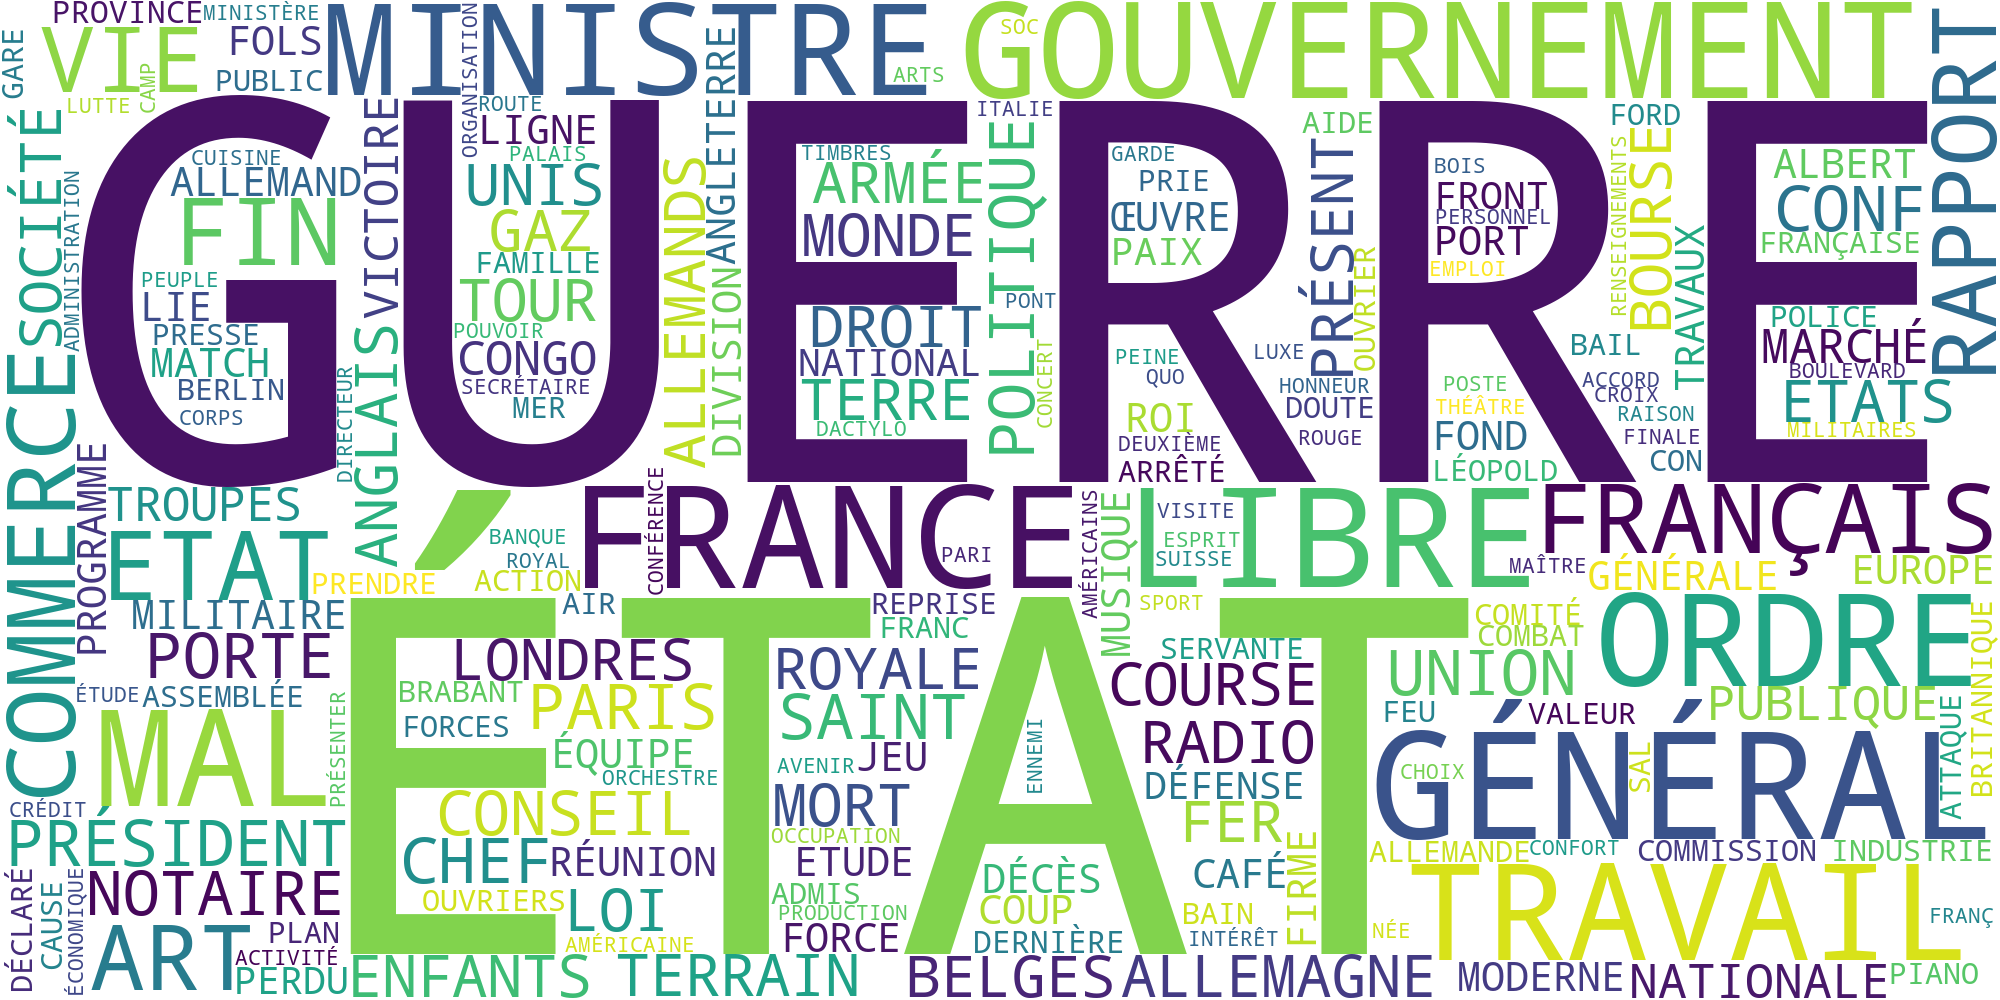

In [487]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{DECADE[:-1]}.png"))
Image(filename=os.path.join(temp_path, f"{DECADE[:-1]}.png"))

# Extraction de Keywords

## Imports

In [488]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

In [489]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [490]:
# Lister les Fichiers
data_path = "../../data/txt"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [491]:
# Imprimer le nombre de fichiers identifiés
len(files)

7986

In [492]:
# Les fichiers de 1940-1949
files = [f for f in files if '194' in f]

In [493]:
# Choisir un fichier
this_file = files[0]
this_file

'KB_JB427_1949-07-18_01-00008.txt'

In [494]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r', encoding='utf-8').read()
text[:500]

"Lundi 18 Juillet 1949 WSSSr \nHBjUa^giLA LIBRE BELGIQUE BS^B \nID H • B B B • • • B D • =J I 11 tt l> U B H M E H • B B 9 B B B B B BIli CHRONIQUE FEMININE \nMéditation sur la beauté \n•••-\nc Tu me diras lequel tu préfè\xad\nres, c'est-à-dire celui que tu vou\xad\ndrais avoir devant les yeux pour le \nreste de ta vie sans en être fati\xad\nguée jamais, et nous le volerons \nensemble ! », me dit mon oncle. \nSur cette résolution pleine d'hon\xad\nnêteté, nous nous séparâmes, trou\xad\nvant que ta contemplation parfai\xad\nte d"

In [495]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('BIli CHRONIQUE FEMININE', np.float64(0.0011186237398072539)),
 ('CHRONIQUE FEMININE Méditation', np.float64(0.002071352807374001)),
 ('vous', np.float64(0.0032339375728419016)),
 ('CHRONIQUE FEMININE', np.float64(0.0046004641036852326)),
 ('Vous avez', np.float64(0.010039503326041721)),
 ('beauté', np.float64(0.010814406148108054)),
 ('giLA LIBRE BELGIQUE', np.float64(0.010829543302302503)),
 ("c'est", np.float64(0.01088608598045566)),
 ('vous vous', np.float64(0.012345499455479917)),
 ('vous vous sen', np.float64(0.013010233726050592)),
 ('beau', np.float64(0.015289131415848825)),
 ('BIli CHRONIQUE', np.float64(0.016221487391293136)),
 ('jeune', np.float64(0.016400068526375124)),
 ('vie', np.float64(0.023676167020677933)),
 ("J'ai", np.float64(0.025512994146682753)),
 ('jeune homme', np.float64(0.0257094971573222)),
 ('jeune fille', np.float64(0.026785492814509565)),
 ('ans', np.float64(0.027337470102563752)),
 ('Dieu', np.float64(0.028679256381304336)),
 ("C'est beau", np.float64(

In [496]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['CHRONIQUE FEMININE',
 'Vous avez',
 'vous vous',
 'BIli CHRONIQUE',
 'jeune homme',
 'jeune fille',
 "C'est beau",
 'FEMININE Méditation',
 'LIBRE BELGIQUE',
 'jeunes filles',
 'vous remercie',
 "c'est Dieu",
 'WSSSr HBjUa',
 'volerons ensemble']

## Faire la même opération sur tous les documents

In [497]:
for f in sorted(files)[:10]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB427_1949-07-18_01-00008.txt mentions these keywords: CHRONIQUE FEMININE, Vous avez, vous vous, BIli CHRONIQUE, jeune homme, jeune fille, C'est beau, FEMININE Méditation, LIBRE BELGIQUE, jeunes filles, vous remercie, c'est Dieu, WSSSr HBjUa, volerons ensemble...
KB_JB449_1947-08-29_01-00003.txt mentions these keywords: Mgr Lecouvet, Dimanche prochain, ALLOCATIONS COMPENSATOIRES, Ecole Industrielle, nouveau doyen, ler septembre, l'abbé Lebrun, Fanfare Royale, Lundi ler...
KB_JB555_1940-03-01_01-00004.txt mentions these keywords: Défense Nationale, présente loi, jeudi matin, L'INDEPENDANCE BELGE, Ligue Nationale, d'une amende, trains sanitaires, Société Nationale, Commission bancaire, ment d'un, présence d'un, général Michiels, Jeudi soir, D'autre part, Paul CLAUDEL...
KB_JB638_1946-07-18_01-00003.txt mentions these keywords: MEUSE Audi, Nord Belg, Nord Gilly, Helcht-ren Idem, Idem Sde, Camplne Idem, Gaz Liège, vie sauve...
KB_JB835_1949-09-18_01-00004.txt mentions these keywords: Va

# Word Embeddings : le modèle Word2Vec

## Imports

In [498]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

## Chargement et traitement des phrases du corpus

### Création d'un objet qui *streame* les lignes d'un fichier pour économiser de la RAM

In [499]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [500]:
infile = f"../../data/sents.txt"
sentences = MySentences(infile)

### Détection des bigrams

In [501]:
bigram_phrases = Phrases(sentences)

In [502]:
type(bigram_phrases.vocab)

dict

### Conversion des `Phrases` en objet `Phraser`

In [503]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

### Extraction des trigrams

In [504]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [505]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

### Création d'un corpus d'unigrams, bigrams, trigrams

In [506]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

## Entrainement d'un modèle Word2Vec sur ce corpus

In [507]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=10, # La taille du "contexte", ici 10 mots avant et après le mot observé
    min_count=6, # On ignore les mots qui n'apparaissent pas au moins 6 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 46.4 s
Wall time: 17.5 s


### Sauver le modèle dans un fichier

In [508]:
outfile = f"../../data/newspapers.model"
model.save(outfile)

## Explorer le modèle

### Charger le modèle en mémoire

In [509]:
model = Word2Vec.load("../../data/newspapers.model")

### Calculer la similarité entre deux termes

In [510]:
model.wv.similarity("banque", "credit")

np.float32(0.70054746)

In [511]:
model.wv.similarity("chat", "chien")

np.float32(0.6418873)

In [512]:
model.wv.similarity("communiste", "socialiste")

np.float32(0.76414263)

In [513]:
model.wv.similarity("communiste", "liberal")

np.float32(0.8124714)

In [514]:
model.wv.similarity("communiste", "sovietique")

np.float32(0.91342735)

### Chercher les mots les plus proches d'un terme donné

In [515]:
model.wv.most_similar("medecin", topn=10)

[('docteur', 0.8174608945846558),
 ('chef', 0.7772440314292908),
 ('second', 0.7483919262886047),
 ('frere', 0.7483416795730591),
 ('procureur', 0.7479368448257446),
 ('capitaine', 0.7467225790023804),
 ('teur', 0.7408373355865479),
 ('fonctionnaire', 0.7405400276184082),
 ('chevalier', 0.740103542804718),
 ('clerc', 0.7397238612174988)]

In [516]:
model.wv.most_similar("biere", topn=10)

[('bords', 0.7785583138465881),
 ('chicoree', 0.7575550675392151),
 ('vitrine', 0.7526769638061523),
 ('en_bouteilles', 0.7486172318458557),
 ('louage', 0.7374718189239502),
 ('faience', 0.7338456511497498),
 ('grande_maison', 0.7251142859458923),
 ('fourrure', 0.7246275544166565),
 ('confortable', 0.722705066204071),
 ('laiterie', 0.7148827910423279)]

In [517]:
model.wv.most_similar("voiture", topn=10)

[('voilure', 0.8173792362213135),
 ('cheval', 0.8062645196914673),
 ('chasse', 0.78367680311203),
 ('le_tiroir', 0.7709015607833862),
 ('terrasse', 0.7646108865737915),
 ('route', 0.757082462310791),
 ('charrette', 0.7464285492897034),
 ('une_voiture', 0.7302750945091248),
 ('couche', 0.7282354831695557),
 ('sa_chambre', 0.7184703350067139)]

In [518]:
model.wv.most_similar("communiste", topn=30)

[('sovietique', 0.9134272933006287),
 ('du_marechal', 0.89368736743927),
 ('des_evenements', 0.8923259377479553),
 ('budgetaire', 0.8921332955360413),
 ('republicaine', 0.8911387324333191),
 ('la_censure', 0.8910616040229797),
 ('une_declaration', 0.8907594084739685),
 ('penale', 0.8905113935470581),
 ('serbe', 0.8902953267097473),
 ('du_jury', 0.8890253305435181),
 ('des_experts', 0.8866713643074036),
 ('du_reich', 0.8851520419120789),
 ('chinoise', 0.8848066926002502),
 ('des_temoins', 0.8847599625587463),
 ('du_pape', 0.8833891749382019),
 ('du_tsar', 0.8830699324607849),
 ('en_termes', 0.8826181292533875),
 ('la_yougoslavie', 0.8813484907150269),
 ('siniavski', 0.8804281949996948),
 ('des_magistrats', 0.8794429302215576),
 ('jdanov', 0.8791157603263855),
 ('la_resolution', 0.8790468573570251),
 ('navale', 0.8781411051750183),
 ('le_suffrage', 0.8773563504219055),
 ('des_insurges', 0.8762433528900146),
 ('aux_cortes', 0.8745127320289612),
 ('dewet', 0.8741904497146606),
 ('diplomati